In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

seed = 1234
np.random.seed(seed)

## Preprocessing and Cleaning

In [4]:
data = [1,2,3,4,5]

X = []
y = []

# merge all training files into one dictionary
for i in data:
    td = unpickle(f'data_batch_{i}')
    tx = td[b'data']
    ty = td[b'labels']
    tx = tx.reshape(10000, 3072)
    X.append(tx)
    y.extend(ty)
    
X = np.concatenate(X)

te_d = unpickle('test_batch')

X_tr = X
y_tr = y

# Assign the data and its labels
X_te = te_d[b'data']
y_te = te_d[b'labels']

# Transform the testing and training set
sclr = StandardScaler()
X_tr = sclr.fit_transform(X_tr.astype(float))
X_te = sclr.fit_transform(X_te.astype(float))


## KNN Classifier Testing

In [ ]:
seed = 1234
np.random.seed(seed)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform',
                       leaf_size=30, n_jobs=-1)
knn.fit(X_tr, y_tr)

knn_tr_pred = knn.predict(X_tr)
knn_val_pred = knn.predict(X_te)

tr_acc = accuracy_score(knn_tr_pred, y_tr)
val_acc = accuracy_score(knn_val_pred, y_te)

print(f'KNN Final Results')
print(f'--- Accuracy (train): {tr_acc}')
print(f'--- Accuracy (testing): {val_acc}\n')

sklearn_cm = confusion_matrix(y_te, knn_val_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [ ]:
print(classification_report(knn_val_pred, y_te))

## Logistic Regression Classifier Testing

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Final Results
--- Accuracy (train): 0.45552
--- Accuracy (testing): 0.4184



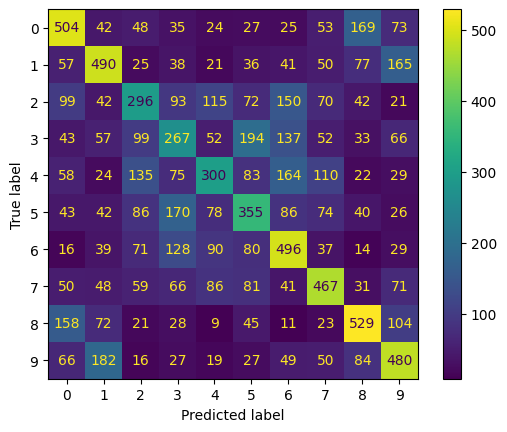

In [8]:
seed = 1234
np.random.seed(seed)

log = LogisticRegression(penalty='l2', multi_class='auto', solver='lbfgs', 
                         C=0.001, max_iter=100, random_state=seed)

log.fit(X_tr, y_tr)

log_tr_pred = log.predict(X_tr)
log_val_pred = log.predict(X_te)

tr_acc = accuracy_score(log_tr_pred, y_tr)
val_acc = accuracy_score(log_val_pred, y_te)

print(f'Logistic Regression Final Results')
print(f'--- Accuracy (train): {tr_acc}')
print(f'--- Accuracy (testing): {val_acc}\n')

sklearn_cm = confusion_matrix(y_te, log_val_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();


In [9]:
print(classification_report(log_val_pred, y_te))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      1094
           1       0.49      0.47      0.48      1038
           2       0.30      0.35      0.32       856
           3       0.27      0.29      0.28       927
           4       0.30      0.38      0.33       794
           5       0.35      0.35      0.36      1000
           6       0.50      0.41      0.45      1200
           7       0.47      0.47      0.47       986
           8       0.53      0.51      0.52      1041
           9       0.48      0.45      0.47      1064

    accuracy                           0.42     10000
   macro avg       0.42      0.41      0.42     10000
weighted avg       0.43      0.42      0.42     10000



## MLP Classifier Testing

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP Classifier Final Results
--- Accuracy (train): 0.93056
--- Accuracy (tesing): 0.4733



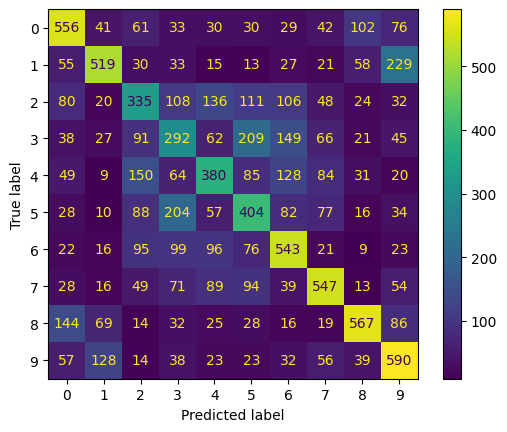

In [13]:
seed = 1234
np.random.seed(seed)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), solver='sgd',
                alpha=0.001, batch_size=32, activation='relu', 
                max_iter=100, learning_rate='constant', 
                learning_rate_init=0.001,
                random_state=seed)


mlp.fit(X_tr, y_tr)
mlp_tr_pred = mlp.predict(X_tr)
mlp_val_pred = mlp.predict(X_te)

tr_acc = accuracy_score(mlp_tr_pred, y_tr)
val_acc = accuracy_score(mlp_val_pred, y_te)

print(f'MLP Classifier Final Results')
print(f'--- Accuracy (train): {tr_acc}')
print(f'--- Accuracy (tesing): {val_acc}\n')

sklearn_cm = confusion_matrix(y_te, mlp_val_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [14]:
print(classification_report(mlp_val_pred, y_te))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1057
           1       0.52      0.61      0.56       855
           2       0.34      0.36      0.35       927
           3       0.29      0.30      0.30       974
           4       0.38      0.42      0.40       913
           5       0.40      0.38      0.39      1073
           6       0.54      0.47      0.50      1151
           7       0.55      0.56      0.55       981
           8       0.57      0.64      0.60       880
           9       0.59      0.50      0.54      1189

    accuracy                           0.47     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.48      0.47      0.47     10000



## Random Forest Classifier Testing

Random Forest Final Results
--- Accuracy (train): 0.99636
--- Accuracy (testing): 0.4845



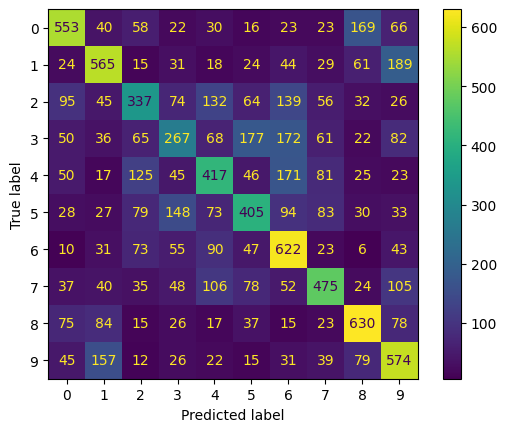

In [10]:
seed = 1234
np.random.seed(seed)

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=20, min_samples_split=5,
                            min_samples_leaf=2, n_jobs=-1, random_state=seed)
rfc.fit(X_tr, y_tr)

rfc_tr_pred =rfc.predict(X_tr)
rfc_val_pred = rfc.predict(X_te)

tr_acc = accuracy_score(rfc_tr_pred, y_tr)
val_acc = accuracy_score(rfc_val_pred, y_te)

print(f'Random Forest Final Results')
print(f'--- Accuracy (train): {tr_acc}')
print(f'--- Accuracy (testing): {val_acc}\n')

sklearn_cm = confusion_matrix(y_te, rfc_val_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [12]:
print(classification_report(rfc_val_pred, y_te))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       967
           1       0.56      0.54      0.55      1042
           2       0.34      0.41      0.37       814
           3       0.27      0.36      0.31       742
           4       0.42      0.43      0.42       973
           5       0.41      0.45      0.42       909
           6       0.62      0.46      0.53      1363
           7       0.47      0.53      0.50       893
           8       0.63      0.58      0.61      1078
           9       0.57      0.47      0.52      1219

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.50      0.48      0.49     10000

